<a href="https://colab.research.google.com/github/snowmaricano/Bigdata/blob/main/%5Bpandas_02%5D_drinks_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_01

Cloning into 'data_01'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


## 2.Colab에서 한글 폰트 사용하기

In [ ]:
### [230417]변경안내
# colab에서 matplotlib의 버전이 변경되면서
# koreanize_matplotlib 사용이 가능해 졌습니다.
# 아래의 설치 후, import koreanize_matplotlib 를 한 뒤 사용하시면 됩니다.

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
# 사용 예시!
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

## 3.알코올을 가장 많이 마시는 나라는?

- country	: 국가명
- beer_servings : 맥주 소비량
- spirit_servings : 증류주 소비량(독주, 알코올 함량 20% 이상의 설탕을 첨가하지 않은 증류주)
- wine_servings : 와인 소비량
- total_litres_of_pure_alcohol : 순수 알코올
- continent : 대륙

In [ ]:
# [2-0] 사용라이브러리 import


### 3-1. 파일 가져오기
csv 파일 가져오기
- csv 파일은 컬럼 구분이 콤마(,) 로 이루어진 파일
- df = pd.read_csv(파일이름) : csv 형식의 파일을 읽어 DataFrame 객체로 가져옴
- DataFrame.to_csv(파일이름, index=True) : DataFrame을 csv 파일로 저장, index는 제외하고 저장하기 위해서는 index=False로 지정

In [ ]:
# [2-1] drinks.csv 파일을 DataFrame으로 불러오기 합니다.


In [ ]:
# [2-2] df의 데이터 모습을 확인하기 위해 첫 5개 데이터를 출력합니다


In [ ]:
# [2-3] df의 컬럼명을 한글로 변경합니다.
# ['국가', '맥주', '증류주', '와인', '알코올','대륙']
df.columns =

# 변경되었는지 확인합니다.


In [ ]:
# [2-4] df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인합니다.


In [ ]:
# '대륙'에 대한 정보가 부족한 것을 확인할 수 있습니다.
# 이유가 무엇일까요? 어떻게 해결할 수 있을까요?

In [ ]:
# drinks.csv 파일을 열어 원인을 확인하여 보도록 합니다.

대륙의 종류
- 아시아, 유럽, 아프리카, 북아메리카, 남아메리카, 오세아니아
- AS, EU, AF, NA, SA, OC

### 3-2. 결측치 확인 및 해결
결측치
- 값이 없음을 나타냄
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음


- DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수



데이터 종류 확인
- 주로 범주형 데이터에 사용함
    - 성별, 지역, 부서 등의 몇 개의 그룹으로 표현되는 데이터
    - 숫자 또는 문자열로 표현 될 수 있음
- Series.unique() : **결측치를 포함**하며, 중복을 제외한 데이터의 종류를 ndarray로 반환
- Series.value_counts() : **결측치를 포함하지 않으며**, 데이터 종류별 개수를 Series로 반환

In [ ]:
# [2-5] 대륙의 종류를 알아봅니다
# 결과를 보면 csv파일에서 'NA'로 되어 있는 데이터를 NaN(=nan)으로 가져온 것입니다.


In [ ]:
# [2-6] 대륙별 개수를 알아봅니다.


In [ ]:
# [2-7] 결측치를 컬럼 별로 집계해 봅니다.


In [ ]:
# [2-8] isna()를 사용해 대륙에서 결측치로 취급된 데이터만 출력해 봅니다
# 북아메리카(NA)에 포함되는 국가들인 것을 확인할 수 있습니다.


결측치 해결방법
- pd.read_csv(파일이름, na_filter=False) : NA를 NaN(결측치)로 읽는 동작을 멈추게 합니다.
- 옵션 확인 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.htm
- DataFrame.fillna(값) : 결측값을 특정 값으로 채우기 합니다.
- Series.fillna(값) : 결측값을 특정 값으로 채우기 합니다.
    - 연속형 데이터 : 0으로 채우기, 평균값으로 채우기, 범주별 평균값 채우기 등
    - 범주형 데이터 : 다른 범주로 만들어 채우기
- DataFrame.loc[Series.isna(), 컬럼명] = 값

In [ ]:
# [2-9] 해결방법 1
# read_csv의 옵션을 사용하여 해결합니다.
# read_csv에서 'NA'를 NaN으로 읽도록하는 동작을 멈추게 합니다.
# na_filter=False 를 사용하면 NA를 NaN으로 읽지 않습니다.


In [ ]:
# [2-10] df2의 'continent' (대륙)에 포함된 값의 종류를 unique를 사용해 살펴 봅니다
# NaN 대신 'NA'가 있는 것을 확인할 수 있습니다.


In [ ]:
# [2-10] 해결방법 2
# NaN으로 읽어온 데이터를 'NA'로 변경합니다.


In [ ]:
# [2-11] 결측치가 제거 되었는지 컬럼 별 결측치 개수를 출력해 확인합니다.


In [ ]:
# [2-12] unique()를 사용하여 '대륙'의 종류를 확인해 봅니다.


### 3-3. 통계치 구하기
- DataFrame.describe() : 숫자형 데이터타입을 갖는 컬럼에 대해 count, mean, std, min, max, Q1, Q2, Q3 등의 통계값 구하기
- DataFrame.count() : 개수
- DataFrame.sum() : 합계
- DataFrame.mean() : 평균
- DataFrame.std() : 표준편차
- DataFrame.var() : 분산
- DataFrame.quantile() : 분위수
- DataFrame.함수(axis=1)을 사용하여 행별 통계값을 구할 수 있음
   - axis=0 : 기본값이며, 행을 이동하며, 행과 행의 연산을 수행함
   - axis=1 : 컬럼을 이동하며 컬럼과 컬럼의 연산을 수행함

In [ ]:
# [2-13] describe 함수를 사용해 전세계 맥주, 증류주, 와인, 알코올 소비에 대한 통계치를 구해봅니다.


In [ ]:
# [2-14] 전세계 맥주, 증류주, 와인, 알코올 소비에 대한 정보만 추출하여 df2로 지정합니다.


In [ ]:
# [2-15] 전세계 맥주, 증류주, 와인, 알코올의 소비에 대한 (df2) '평균'만 구해봅니다.


In [ ]:
# [2-16] 전세계 맥주, 증류주, 와인, 알코올의 소비에 대한 (df2) '중앙값'만 구해봅니다.


In [ ]:
# [2-17] 전세계 맥주, 증류주, 와인, 알코올의 소비에 대한 '최대값'만 구해봅니다.


In [ ]:
# [2-18] 전세계 맥주, 증류주, 와인, 알코올의 소비에 대한 '최소값'만 구해봅니다.


In [ ]:
# [2-19] 전세계 맥주, 증류주, 와인, 알코올의 소비에 대한 (df2) Q1, Q2, Q3를 구해봅니다.


In [ ]:
# 표준편차(std), 분산(var)에 대해서도 작업해 보세요 ^_^!!!

In [ ]:
# [2-20] df (object dtype이 존재함) 에 대해서 컬럼별 min을 구해 봅니다.
# dtype이 object이 컬럼의 min은 오름차순 정렬시 가장 앞에 있는 것
# dtype이 object이 컬럼의 max는 오름차순 정렬시 가장 뒤에 있는 것
# 문자열 정렬시에는 문자의 코드값을 사용함 : ord(문자)



각 컬럼 별 함수 적용
- DataFrame.apply(함수) : Series로 결과가 반환됨
- DataFrame.apply([함수1, 함수2, ...]) : DataFrame으로 결과가 반환됨
- 사용자 정의 함수, 외부 함수, 내장 함수 등 다양한 함수를 사용할 수 있음
- Series의 통계 함수들은 문자열 형태로 사용할 수 있음 : 'min', 'max', 'count', 'std', 'var', 'mean', 'median'

In [ ]:
# [2-21] df2의 각 컬럼별 평균을 구해 봅니다.


In [ ]:
# [2-22] df2의 최소, 최대, 평균값을 구해봅니다.


### 3-4. 주류 소비량 비교



In [ ]:
# pandas의 max_rows, max_columns 설정
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

Series의 연산
- Series 끼리 또는 Series와 스칼라는 다양한 연산을 할 수 있음
- index에 맞춰 element wise 연산됨
   - 산술연산(수치): +, -, *, /, //, %  
   - 비교연산(True/False): >, <, >=, <=, ==, !=  
   - True/False의 관계연산(True/False): &, |, ~  

In [ ]:
# [2-23] 와인 소비량이 맥주 + 증류주 소비량보다 큰 나라를 검색해,'대륙'을 기준으로 정렬해 보자


In [ ]:
# [2-24] 맥주 소비량이 230 초과이면서, 와인 소비량이 230 초과인 나라를 검색해 보자


In [ ]:
# [2-25] 대륙이 'AS'인 국가들의 정보를 검색해 보자


DataFrame에 새로운 컬럼 추가
- DataFrame[컬럼명] = 데이터목록
- 컬럼명은 기존 DataFrame에 존재하지 않는 이름이어야 함
- 데이터목록은 DataFrame의 다른 컬럼들과 같은 개수이어야 하며 list, Series 등의 형태일 수 있음

DataFrame의 컬럼 제거
- del DataFrame[컬럼명]
- DataFrame.drop(컬럼명, axis=1), DataFrame.drop([컬럼명1, 컬럼명2, ...], axis=1)
- DataFrame.drop(columns=[컬럼명...])

**아래의 내용이 수정되어 있습니다. ^_^**

DataFrame의 행 제거
- axis=0 이 기본값이므로 생략하여도 됨
- DataFrame.drop(행이름), DataFrame.drop([행이름1, 행이름2, ...])
- DataFrame.drop(rows=[행이름1, 행이름2 ...])

In [ ]:
이런 ㅠ.........ㅠ   '행 제거'인데 영상 찍을 때 '열 제거'로 되어 있었습니다!

In [ ]:
# [2-26] 국가별 주류 소비량 합계를 구해 새로운 컬럼 ('주류소비량')를 추가합니다
# 주류소비량 = '맥주' + '증류주' + '와인'


In [ ]:
# [2-27] 주류소비량2 = ['맥주', '증류주', '와인']에 대해 DataFrame.sum(axis=1) 함수 사용


In [ ]:
# [2-28] 주류 소비량 대비 알코올 소비량 비율을 구해 새로운 컬럼 ('알코올비율')을 추가합니다.
# 알코올비율 = '알코올' / '주류소비량'


In [ ]:
# [2-29] 알코올비율이 높은 국가 TOP5의 ['국가', '주류소비량', '알코올비율'] 정보를 구해 봅니다.
# HINT) sort_values, indexing 사용


In [ ]:
# [2-30] '주류소비량2' 컬럼을 제거하여 봅니다.
#df = df.drop('주류소비량2', axis=1)
#df = df.drop(columns=['주류소비량2'])


In [ ]:
# [2-31] '알코올비율'이 NaN인 것에 대해 0으로 채우기 합니다.


Columns, Index 상호 변경
- DataFrame.set_index(컬럼명) : 지정한 컬럼을 index로 지정함
- DataFrame.set_index([컬럼명1, 컬럼명2, ...]) : 컬럼 목록을 index(Multi Index)로 지정함
    - columns에서 index 쪽으로 이동됨, 기존 index는 제거됨
- DataFrame.reset_index() : 모든 index 가 columns로 이동됨
    - index는 RangeIndex로 대체됨

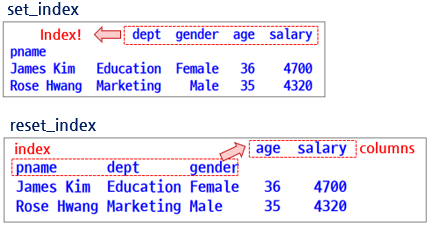

In [ ]:
# [2-32] 국가별 주류 소비량 합계(맥주, 증류주, 와인의 합)를 구해 봅니다.


In [ ]:
# [2-33] df를 ['대륙', '국가']를 index로 지정하고, 대륙별, 국가명으로  정렬하여 df로 저장합니다.


맥주  증류주   와인  알코올  주류소비량     알코올비율
대륙 국가                                               
AF Algeria        25    0   14  0.7     39  0.017949
   Angola        217   57   45  5.9    319  0.018495
   Benin          34    4   13  1.1     51  0.021569
   Botswana      173   35   35  5.4    243  0.022222
   Burkina Faso   25    7    7  4.3     39  0.110256
...              ...  ...  ...  ...    ...       ...
SA Paraguay      213  117   74  7.3    404  0.018069
   Peru          163  160   21  6.1    344  0.017733
   Suriname      128  178    7  5.6    313  0.017891
   Uruguay       115   35  220  6.6    370  0.017838
   Venezuela     333  100    3  7.7    436  0.017661

[193 rows x 6 columns]

In [ ]:
# [2-34] df의 index를 모두 columns로 이동합니다.


,대륙,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
0,AF,Algeria,25,0,14,0.7,39,0.017949
1,AF,Angola,217,57,45,5.9,319,0.018495
2,AF,Benin,34,4,13,1.1,51,0.021569
3,AF,Botswana,173,35,35,5.4,243,0.022222
4,AF,Burkina Faso,25,7,7,4.3,39,0.110256
...,...,...,...,...,...,...,...,...
188,SA,Paraguay,213,117,74,7.3,404,0.018069
189,SA,Peru,163,160,21,6.1,344,0.017733
190,SA,Suriname,128,178,7,5.6,313,0.017891
191,SA,Uruguay,115,35,220,6.6,370,0.017838


In [ ]:
# [2-35] 전세계 평균 소비량과 한국('South Korea')의 소비량을 비교해 보려고 합니다.
# 먼저, 한국의 소비량을 조회하여 korea로 저장합니다.
korea =
korea

DataFrame에서 특정 행, 열 제거
- DataFrame.drop(행, axis=0)
- DataFrame.drop([행1, 행2, ...], axis=0)
- DataFrame.drop(열, axis=1)
- DataFrame.drop([열1, 열2, ...], axis=1)
- indexing을 사용하여, 제거할 정보가 아닌 필요한 정보를 가져오기 하여 특정 행/열 제거

In [ ]:
# [2-36] korea 정보 중에서 대륙 정보를 제거합니다.


,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
138,South Korea,140,16,9,9.8,165,0.059394


원하는 컬럼만 추출하기
- DataFrame.loc[:, 시작컬럼명:끝컬럼명]
- DataFrame.iloc[:, 시작컬럼번호:끝컬럼번호+1]
   - 특정 번호부터 끝까지 모든 컬럼을 대상으로 하며면 끝컬럼번호+1 정보를 생략함

In [ ]:
# [2-37] indexing을 사용하여 korea 정보 중 대륙 정보를 제거합니다. (DataFrame.loc[])


,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
85,South Korea,140,16,9,9.8,165,0.059394


In [ ]:
# [2-38] indexing을 사용하여 korea 정보 중 대륙 정보를 제거합니다. (DataFrame.iloc[])


,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
85,South Korea,140,16,9,9.8,165,0.059394


In [ ]:
# [2-39] korea에 대륙 정보가 제거된 정보를 다시 저장합니다.
korea =
korea

,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
138,South Korea,140,16,9,9.8,165,0.059394


In [ ]:
# [2-40] 세계의 각 컬럼별 평균을 구하여 DataFrame으로 만들고,
# worldwide라는 이름을 지정합니다
# 세계의 각 컬럼별 평균은 DataFrame.mean(numeric_only=True)을 사용합니다.
worldwide =
worldwide

,0
맥주,106.160622
증류주,80.994819
와인,49.450777
알코올,4.717098
주류소비량,236.606218
알코올비율,0.026115


DataFrame의 행/열 전환
- DataFrame.T : index, columns의 위치가 바뀜

In [ ]:
# [2-41] worldwide의 행과 열을 전환해 wwT로 저장합니다.
wwT =
wwT

,맥주,증류주,와인,알코올,주류소비량,알코올비율
0,106.160622,80.994819,49.450777,4.717098,236.606218,0.026115


DataFrame의 임의 위치 열 삽입
- DataFrame.insert(위치, 컬럼, 값) : inplace 동작됨 (새로운 return 없음)

In [ ]:
# [2-42] wwT의 맨 앞에 '국가' 컬럼을 'World Wide' 값으로 추가합니다.
# 여러 번 추가하면 안됨



,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
0,World Wide,106.160622,80.994819,49.450777,4.717098,236.606218,0.026115


DataFrame의 행(들) 추가
- DataFrame.append(DataFrame) : 새로운 DataFrame 반환
- 2개를 1개로 합치는 작업 가능
- **pandas 버전이 높아져서 AttributeError 가 발생합니다.**
- **pd.concat() 함수를 사용하셔야 합니다.**

In [ ]:
# [2-43] korea 뒤에 wwT를 추가하여 compT 로 이름 붙입니다
# DataFrame.append(DataFrame)은 pandas 버전이 높은 경우 AttributeError가 발생합니다.
compT =
compT

,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
138,South Korea,140.000000,16.000000,9.000000,9.800000,165.000000,0.059394
0,World Wide,106.160622,80.994819,49.450777,4.717098,236.606218,0.026115


In [ ]:
# 한국의 맥주 및 알코올 소비량이 전세계 맥주 소비량보다 많은 것을 알 수 있습니다.

여러 개의 DataFrame을 합쳐 하나의 DataFrame 생성
- pd.concat([df1, df2, ....], axis=0) : index 방향으로 합치기
- pd.concat([df1, df2, ....], axis=1) : columns 방향으로 합치기
- DataFrame.append()와는 달리 여러 개의 DataFrame 목록을 주어 여러 개를 한 번에 합칠 수 있음

In [ ]:
# [2-44] wwT와 korea 를 합쳐 하나의 DataFrame을 생성하여 df2로 저장합니다.
df2 =
df2

,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
138,South Korea,140.000000,16.000000,9.000000,9.800000,165.000000,0.059394
0,World Wide,106.160622,80.994819,49.450777,4.717098,236.606218,0.026115


In [ ]:
# [2-45] df2를 '국가' 컬럼을 index로 설정하여 df3으로 저장합니다
df3 =
df3

,맥주,증류주,와인,알코올,주류소비량,알코올비율
국가,,,,,,
South Korea,140.000000,16.000000,9.000000,9.800000,165.000000,0.059394
World Wide,106.160622,80.994819,49.450777,4.717098,236.606218,0.026115


In [ ]:
# [2-46] df3의 행,열을 전환하여 출력합니다.


국가,South Korea,World Wide
맥주,140.000000,106.160622
증류주,16.000000,80.994819
와인,9.000000,49.450777
알코올,9.800000,4.717098
주류소비량,165.000000,236.606218
알코올비율,0.059394,0.026115


### 3-5. 맥주 소비량

In [ ]:
# [2-47] 주류소비량이 있으면서, 맥주를 소비하지 않는 나라의 맥주, 증류주, 와인, 알코올, 대륙 등 모든 정보를 구해 봅니다.
# indexing 사용


,국가,맥주,증류주,와인,알코올,대륙,주류소비량,알코올비율
40,Cook Islands,0,254,74,5.9,OC,328,0.017988
149,Saudi Arabia,0,5,0,0.1,AS,5,0.020000


In [ ]:
# [2-48] 주류소비량이 있으면서, 맥주를 소비하지 않는 국가의 국가명 목록을 구해봅니다.


['Saudi Arabia', 'Cook Islands']

In [ ]:
# [2-49] 주류소비량이 정보가 없는 국가의 정보를 구해 봅니다.


In [ ]:
# [2-50] 맥주 소비량의 값이 큰 5개 국가를 알아봅니다.


,대륙,국가,맥주,증류주,와인,알코올,주류소비량,알코올비율
35,AF,Namibia,376,3,1,6.8,380,0.017895
108,EU,Czech Republic,361,170,134,11.8,665,0.017744
19,AF,Gabon,347,98,59,8.9,504,0.017659
114,EU,Germany,346,117,175,11.3,638,0.017712
121,EU,Lithuania,343,244,56,12.9,643,0.020062


In [ ]:
# [2-51] 맥주 소비량이 세계 평균 소비량보다 큰 국가의 개수는?


76

### 3-6. 어느 대륙에서 평균보다 맥주를 더 많이 마시는가?
그룹별 통계치 구하기  
- DataFrame.groupby(컬럼명).적용할통계함수()
    - DataFrame의 **함수 적용 가능 컬럼들**에 대해 그룹별 통계치를 구함
    - 통계함수에는 sum, mean, std, var, min, max, count, quantile 등이 있음


- DataFrame.groupby(컬럼명)[컬럼명].적용할통계함수()
    - **특정 컬럼(들)**에 대한 결과만 확인할 때
    - [컬럼명] : 결과가 Series
    - [[컬럼명]] : 결과가 DataFrame
    - [[컬럼명1, 컬럼명2, ..]] : 결과 DataFrame

- DataFrame.groupby(컬럼명)[컬럼명].agg([통계함수1, 통계함수2 , ...])를 사용함
    - 여러 개의 통계함수를 적용
    - 통계함수를 문자열 형식으로 사용 가능

In [ ]:
# [2-52] 전세계 주류 소비량 평균


맥주       106.160622
증류주       80.994819
와인        49.450777
알코올        4.717098
주류소비량    236.606218
알코올비율      0.026115
dtype: float64

In [ ]:
# [2-53] 대륙별 주류 소비량 평균을 계산해 봅니다.


,맥주,증류주,와인,알코올,주류소비량,알코올비율
대륙,,,,,,
AF,61.471698,16.339623,16.264151,3.007547,94.075472,0.049741
AS,37.045455,60.840909,9.068182,2.170455,106.954545,0.016359
EU,193.777778,132.555556,142.222222,8.617778,468.555556,0.017527
NA,145.434783,165.739130,24.521739,5.995652,335.695652,0.017854
OC,89.687500,58.437500,35.625000,3.381250,183.750000,0.016895
SA,175.083333,114.750000,62.416667,6.308333,352.250000,0.017868


In [ ]:
# [2-54] 대륙별 주류 소비량 중앙값을 계산해 봅니다.


,맥주,증류주,와인,알코올,주류소비량,알코올비율
대륙,,,,,,
AF,32.0,3.0,2.0,2.30,49.0,0.021951
AS,17.5,16.0,1.0,1.20,68.0,0.017843
EU,219.0,122.0,128.0,10.00,541.0,0.017865
NA,143.0,137.0,11.0,6.30,349.0,0.017818
OC,52.5,37.0,8.5,1.75,98.5,0.017732
SA,162.5,108.5,12.0,6.85,383.0,0.017786


In [ ]:
# [2-55] 대륙별 맥주 소비량 평균은?


,맥주
대륙,
AF,61.471698
AS,37.045455
EU,193.777778
NA,145.434783
OC,89.687500
SA,175.083333


In [ ]:
# [2-56] 전세계 맥주 소비량 평균보다 많은 맥주를 소비하는 대륙은?
temp =

,맥주
대륙,
EU,193.777778
NA,145.434783
SA,175.083333


In [ ]:
# [2-57] 대륙별 맥주와 와인 소비량의 평균, 중앙값, 최대값은?


맥주                      와인            
          mean median  max        mean median  max
대륙                                                
AF   61.471698   32.0  376   16.264151    2.0  233
AS   37.045455   17.5  247    9.068182    1.0  123
EU  193.777778  219.0  361  142.222222  128.0  370
NA  145.434783  143.0  285   24.521739   11.0  100
OC   89.687500   52.5  306   35.625000    8.5  212
SA  175.083333  162.5  333   62.416667   12.0  221

행, 열에 모두 group을 지정하여 통계값 구하기
- DataFrame.pivot_table(index=행방향컬럼, columns=열방향컬럼, values=집계대상컬럼, aggfunc=구할 통계값)
- 각각에 대해 단독 또는 목록을 사용할 수 있음
- index, columns는 범주형, values는 연속형 사용

In [ ]:
# [2-58] pivot_table을 사용하여 대륙별(index), '맥주'와 '와인'의 mean, median, max 값을 구합니다.
# 결과 참조


mean             median         max     
            맥주          와인     맥주     와인   맥주   와인
대륙                                                
AF   61.471698   16.264151   32.0    2.0  376  233
AS   37.045455    9.068182   17.5    1.0  247  123
EU  193.777778  142.222222  219.0  128.0  361  370
NA  145.434783   24.521739  143.0   11.0  285  100
OC   89.687500   35.625000   52.5    8.5  306  212
SA  175.083333   62.416667  162.5   12.0  333  221

In [ ]:
# [2-59] pivot_table을 사용하여 대륙별(columns), '맥주'와 '와인'의 mean, median값을 구합니다.
# 결과 참조


mean                                              ... median         \
대륙         AF         AS          EU          NA       OC  ...     AS     EU   
맥주  61.471698  37.045455  193.777778  145.434783  89.6875  ...   17.5  219.0   
와인  16.264151   9.068182  142.222222   24.521739  35.6250  ...    1.0  128.0   

                        
대륙     NA    OC     SA  
맥주  143.0  52.5  162.5  
와인   11.0   8.5   12.0  

[2 rows x 12 columns]

In [ ]:
# [2-60] groupby를 사용하여 대륙별, '맥주'와 '와인'의 mean, median, max 값을 구합니다.


맥주                      와인            
          mean median  max        mean median  max
대륙                                                
AF   61.471698   32.0  376   16.264151    2.0  233
AS   37.045455   17.5  247    9.068182    1.0  123
EU  193.777778  219.0  361  142.222222  128.0  370
NA  145.434783  143.0  285   24.521739   11.0  100
OC   89.687500   52.5  306   35.625000    8.5  212
SA  175.083333  162.5  333   62.416667   12.0  221

In [ ]:
# ^^  고생하셨습니다.